<a href="https://colab.research.google.com/github/Aunabil4602/Deep-learning-on-keras-minst-datasets/blob/master/cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [2]:
from keras.datasets import cifar100
(x_train,y_train),(x_test,y_test)=cifar100.load_data()

Using TensorFlow backend.


In [3]:
import numpy as np

print(x_train.shape)
print(y_train.shape)
cnt=np.zeros(100)
for it in range(10000):
  cnt[y_test[it]]+=1
for it in range(100):
  print(cnt[it])

(50000, 32, 32, 3)
(50000, 1)
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0


In [0]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=5,
    width_shift_range=0.05,
    height_shift_range=0.05,
    zoom_range=[1.1,0.9],
    horizontal_flip=True,
    shear_range=5.0
)
datagen.fit(x_train)

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [0]:
from keras.layers import Conv2D,Dense,Input,BatchNormalization,MaxPooling2D,Flatten,Dropout
from keras.models import Model
from keras.utils import to_categorical

In [0]:
def modelMain(inp,classes):
  X=Conv2D(32,(3,3),strides=1,padding='same',activation='relu')(inp)
  X=Conv2D(32,(3,3),strides=1,padding='same',activation='relu')(X)
  X=Conv2D(32,(3,3),strides=1,padding='same',activation='relu')(X)
  X=BatchNormalization(axis=-1)(X)
  X=MaxPooling2D((2,2))(X)
  X=Dropout(0.25)(X)

  X=Conv2D(64,(3,3),strides=1,padding='same',activation='relu')(X)
  X=Conv2D(64,(3,3),strides=1,padding='same',activation='relu')(X)
  X=Conv2D(64,(3,3),strides=1,padding='same',activation='relu')(X)
  X=BatchNormalization(axis=-1)(X)
  X=MaxPooling2D((2,2))(X)
  X=Dropout(0.25)(X)

  X=Conv2D(128,(3,3),strides=1,padding='same',activation='relu')(X)
  X=Conv2D(128,(3,3),strides=1,padding='same',activation='relu')(X)
  X=Conv2D(128,(3,3),strides=1,padding='same',activation='relu')(X)
  X=BatchNormalization(axis=-1)(X)
  X=MaxPooling2D((2,2))(X)
  X=Dropout(0.25)(X)

  X=Conv2D(256,(3,3),strides=1,padding='same',activation='relu')(X)
  X=Conv2D(256,(3,3),strides=1,padding='same',activation='relu')(X)
  X=Conv2D(256,(3,3),strides=1,padding='same',activation='relu')(X)
  X=BatchNormalization(axis=-1)(X)
  X=MaxPooling2D((2,2))(X)
  X=Dropout(0.25)(X)

  X=Conv2D(512,(3,3),strides=1,padding='same',activation='relu')(X)
  X=Conv2D(512,(3,3),strides=1,padding='same',activation='relu')(X)
  X=Conv2D(512,(3,3),strides=1,padding='same',activation='relu')(X)
  X=BatchNormalization(axis=-1)(X)
  X=MaxPooling2D((2,2))(X)
  X=Dropout(0.25)(X)

  X=Flatten()(X)
  X=Dense(1024,activation='relu')(X)
  X=Dense(1024,activation='relu')(X)

  X=Dense(classes,activation='softmax')(X)
  return X

In [8]:
inp=Input((32,32,3))
classes=100
model=modelMain(inp,classes)
model=Model(inp,model)
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()













Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0      

In [0]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)
#x_train=x_train/255
#x_test=x_test/255

In [10]:
print(y_train.shape)
print(y_test.shape)

(50000, 100)
(10000, 100)


In [0]:
from keras.callbacks import ReduceLROnPlateau

In [13]:
EP=50
reduce_lr = ReduceLROnPlateau(monitor='acc', factor=0.5,patience=5, min_lr=0.00001,verbose=1)
history=model.fit_generator(datagen.flow(x_train,y_train,batch_size=128),verbose=1,epochs=EP,validation_data=datagen.flow(x_test,y_test,batch_size=128),callbacks=[reduce_lr])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/50
391/391 [==============================] - 36s 92ms/step - loss: 4.3042 - acc: 0.0321 - val_loss: 5.0305 - val_acc: 0.0220
Epoch 2/50
391/391 [==============================] - 31s 80ms/step - loss: 3.9638 - acc: 0.0665 - val_loss: 4.0150 - val_acc: 0.0675
Epoch 3/50
391/391 [==============================] - 31s 80ms/step - loss: 3.8008 - acc: 0.0897 - val_loss: 4.4117 - val_acc: 0.0575
Epoch 4/50
391/391 [==============================] - 31s 79ms/step - loss: 3.6615 - acc: 0.1119 - val_loss: 3.6839 - val_acc: 0.1159
Epoch 5/50
391/391 [==============================] - 32s 81ms/step - loss: 3.5176 - acc: 0.1339 - val_loss: 3.5109 - val_acc: 0.1394
Epoch 6/50
391/391 [==============================] - 31s 79ms/step - loss: 3.4005 - acc: 0.1530 - val_loss: 3.5172 - val_acc: 0.1486
Epoch 7/50
391/391 [==============================] - 31s 79ms/step - loss: 3.2670 - acc: 0.1748 - v

In [0]:
ans=model.evaluate_generator(datagen.flow(x_test,y_test,batch_size=128))

In [17]:
print(ans)

[1.7707178636550904, 0.5501]


In [0]:
history.history['acc']

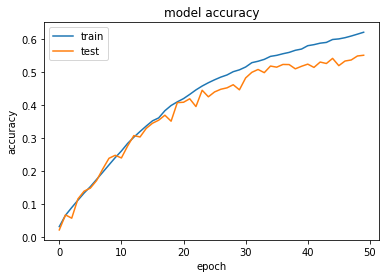

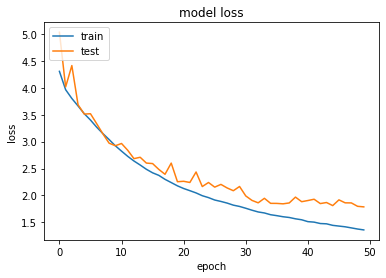

In [18]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
layers_output=[layer.output for layer in model.layers][1:]
activation_model= Model(inp,layers_output)

In [0]:
img=x_train[100]
plt.imshow(img)

In [0]:
img1=img.reshape(1,32,32,3)
activations=activation_model.predict(img1)
print(activations[0].shape)
print(activations[1].shape)
print(activations[2].shape)
print(activations[3].shape)
print(activations[4].shape)
print(activations[5].shape)
f1=activations[0]
f2=activations[1]
f3=activations[2]
plt.figure()
fff,axf=plt.subplots(3,16)
upto=16
for it in range(upto):
  axf[0,it].imshow(f1[0,:,:,it])
  axf[1,it].imshow(f2[0,:,:,it])
  axf[2,it].imshow(f3[0,:,:,it])
plt.show()